In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from nvd3 import lineChart

loaded nvd3 IPython extension
run nvd3.ipynb.initialize_javascript() to set up the notebook
help(nvd3.ipynb.initialize_javascript) for options


In [2]:
df = pd.read_json('debate.json')
df = df.reset_index()
df = df.drop('level_0',axis=1)
df.head()

,clean_tweets,dates,hour,index,lat,long,min,place_names,polarity,polarity_cl,tweets
0,the npr fact check of the second presidential...,1476061483923,1,0,NaN,NaN,4,None,2,2,RT @NPR: The NPR fact check of the second pres...
1,coffee debate time dis gon b good,1476061484882,1,1,NaN,NaN,4,None,2,2,Coffee + debate time. Dis gon b good https://t...
2,in case anyone thinks trump actually cares at...,1476061484860,1,10,NaN,NaN,4,None,2,2,RT @revol_less: In case anyone thinks Trump ac...
3,chew on this trumps lewd audio might have res...,1476061486740,1,100,NaN,NaN,4,None,2,2,RT @NolteNC: Chew on this....\n\nTrump's Lewd ...
4,my fellow americans you are about to witness ...,1476061509584,1,1000,NaN,NaN,5,None,2,2,"RT @OBrienMB_NY: My fellow Americans, you are ..."


In [139]:
polarity = df.groupby(['hour','min'])['polarity'].value_counts().unstack()
polarity = polarity.reset_index().drop(['hour','min'],axis=1)

time_index =  pd.date_range('2016-09-10 21:00:00', periods=len(polarity), freq='min')
time_index_epoch_ms = [int(x.strftime("%s"))*1000 for x in time_index]

polarity = polarity.set_index(time_index)
polarity.columns = ['negative','neutral','positive']
polarity.head()

,negative,neutral,positive
2016-09-10 21:00:00,34,548,66
2016-09-10 21:01:00,136,1939,183
2016-09-10 21:02:00,146,1728,161
2016-09-10 21:03:00,130,1653,181
2016-09-10 21:04:00,129,1799,241


In [40]:
all_tweets = ' '.join(df.clean_tweets.tolist()).lower()
tokens = all_tweets.split()

stop = set(stopwords.words('english'))
tokens = [tkn for tkn in tokens if tkn not in stop]

c = Counter()
c.update(tokens)

In [42]:
c.most_common(100)

[(u'trump', 76444),
 (u'hillary', 29208),
 (u'debate', 20765),
 (u'donald', 16465),
 (u'clinton', 12966),
 (u'like', 12298),
 (u'question', 8416),
 (u'im', 8170),
 (u'women', 6318),
 (u'dont', 6080),
 (u'trumps', 5804),
 (u'people', 5690),
 (u'one', 5688),
 (u'hes', 5471),
 (u'said', 5408),
 (u'know', 5325),
 (u'isis', 5234),
 (u'going', 5092),
 (u'\u2026', 4970),
 (u'-', 4943),
 (u'get', 4932),
 (u'says', 4920),
 (u'talk', 4876),
 (u'time', 4827),
 (u'president', 4743),
 (u'&amp', 4679),
 (u'would', 4595),
 (u'go', 4504),
 (u'cant', 4352),
 (u'say', 4350),
 (u'answer', 4252),
 (u'right', 4231),
 (u'watching', 4069),
 (u'think', 3905),
 (u'bill', 3768),
 (u'presidential', 3661),
 (u'us', 3608),
 (u'good', 3584),
 (u'doesnt', 3564),
 (u'even', 3510),
 (u'tonight', 3307),
 (u'anderson', 3275),
 (u'really', 3197),
 (u'didnt', 3163),
 (u'talking', 3104),
 (u'room', 3002),
 (u'want', 2969),
 (u'great', 2967),
 (u'america', 2955),
 (u'never', 2938),
 (u'cooper', 2908),
 (u'country', 2863),
 

In [97]:
df['sexual'] = df.clean_tweets.map(lambda x : 'sexual' in x)
df['moderators'] = df.clean_tweets.map(lambda x : 'moderators' in x)
df['russia'] = df.clean_tweets.map(lambda x : 'russia' in x)
df['emails'] = df.clean_tweets.map(lambda x : 'emails' in x)
df['shit'] = df.clean_tweets.map(lambda x : 'shit' in x)
df['taxes'] = df.clean_tweets.map(lambda x : 'taxes' in x)
df['isis'] = df.clean_tweets.map(lambda x : 'isis' in x)
df['america'] = df.clean_tweets.map(lambda x : 'america' in x)

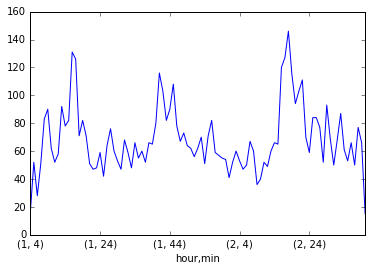

In [98]:
df.groupby(['hour','min'])['america'].value_counts().unstack().iloc[:,1].fillna(0).plot()

In [140]:
pos = polarity.positive.as_matrix()
neg = polarity.negative.as_matrix()
neu = polarity.neutral.as_matrix()

In [143]:
chart = lineChart(name="myChart", x_is_date=True, date_format="%H:%M")
chart.set_graph_width(800)
chart.add_serie(y=pos, x=time_index_epoch_ms, name='Positive',color='green')
chart.add_serie(y=neg, x=time_index_epoch_ms, name='Negative',color='red')
chart.add_serie(y=neu, x=time_index_epoch_ms, name='Neutral',color='blue')

chart.buildhtml()

f = open('sent.html','wb')
f.write(chart.htmlcontent)
f.close()

In [144]:
emails = df.groupby(['hour','min'])['emails'].value_counts().unstack().iloc[:,1].fillna(0)

chart = lineChart(name="myChart", x_is_date=True, date_format="%H:%M")
chart.set_graph_width(800)
chart.add_serie(y=pos, x=time_index_epoch_ms, name='Mentions of "emails"',color='red')

chart.buildhtml()

f = open('emails.html','wb')
f.write(chart.htmlcontent)
f.close()

In [99]:
df.groupby(['hour','min'])['america'].value_counts().unstack().iloc[:,1].fillna(0).sort_values(ascending=False)

hour  min
2     18     146
1     16     131
2     17     127
1     17     126
2     16     120
1     41     116
2     19     115
      22     111
1     45     108
      42     103
2     21     103
      20      94
      29      93
1     13      92
      44      90
      9       90
2     33      87
      25      84
      26      84
1     8       83
      15      82
      43      82
      19      82
      56      82
      40      80
      14      78
      46      78
2     27      77
      38      77
1     27      76
            ... 
      59      55
2     0       54
      4       53
      35      53
1     29      53
2     28      52
1     11      52
2     11      52
1     37      52
2     2       52
1     5       52
      7       51
      21      51
      54      51
2     31      50
      37      50
      6       50
      12      49
1     23      48
      33      48
      22      47
      30      47
2     5       47
1     25      42
2     1       41
      10      40
      9       36
1   

In [100]:
df[(df.hour == 2) & (df['min'] == 18) & (df.america == True)]['tweets'].sample(frac=0.1).tolist()

[u'So the black man all the question about being devoted to all and he immediately speaks of inner city and Afro American Latinos.. \n#debate',
 u'RT @JoyAnnReid: Wow. Trump just said that if he wins, he is going to prosecute his political opponent. Welcome to Third World, America. #de\u2026',
 u'RT @WAITAMlN: trump: "I\'ll be a good president for the African Americans and Hispanic communities"\nboth communities: https://t.co/CtvAuHVfFX',
 u"That's right! #StrongerTogether in @HillaryClinton's America. Not so much in his. #imwithher #debate",
 u'RT @theyearofelan: Every single person who voted for Trump in the primaries owes everyone else in America an apology',
 u'RT @dilemmv: "Africa Americans, inner cities" Yo\' dude, Black people live in New Hampshire too dude, foh  #debate',
 u'RT @FoxNews: .@HillaryClinton: "I have a deep devotion... to making sure that every American feels like he or she has a place in\u2026',
 u"RT @madisonlawrence: I'll be a president for all of our people exc

In [95]:
df[df.breitbart == True].tweets.tolist()

[u"RT @paulkrugman: It's amazing how completely Trump lives in the fever swamps of Breitbart.",
 u'RT @davidsirota: Trump is backed by Breitbart and said he hates single payer...but, um... https://t.co/GsbXc3WbEe',
 u'RT @BDayspring: If HRC was sniffling like Donald Trump is, Breitbart would claim she has Black Lung.',
 u'RT @elongreen: Hillary Clinton is debating a Breitbart comment.',
 u'RT @mattmfm: Trump is literally just reading Breitbart blog posts to a live TV audience tonight.',
 u"RT @pemalevy: Rather than study for this debate, Trump sounds like he's relying on everything his read on Breitbart in the last few years.",
 u'RT @AdrianaCohen16: Hillary Clinton Avoided Taxes the Same Way Trump Did - Breitbart https://t.co/8NUaC9hNGI via @BreitbartNews #debates #T\u2026',
 u'RT @goldengateblond: Trump should just preface every answer with "here are some things I\'ve read on Breitbart News." #debate',
 u"#Vintage #Retro #80s Fact-Check: Donald Trump Says Nuclear Deal Hands '$150 Bil

In [104]:
with_pos = df[df.lat.notnull()]

In [105]:
polarity = with_pos.groupby(['hour','min'])['polarity'].value_counts().unstack()
polarity = polarity.reset_index().drop(['hour','min'],axis=1)

time_index =  pd.date_range('2016-09-10 21:00:00', periods=len(polarity), freq='min')
time_index_epoch_ms = [int(x.strftime("%s"))*1000 for x in time_index]

polarity = polarity.set_index(time_index)
polarity.columns = ['neagative','neutral','positive']
polarity.head()

,neagative,neutral,positive
2016-09-10 21:00:00,2.0,20.0,2.0
2016-09-10 21:01:00,12.0,99.0,8.0
2016-09-10 21:02:00,10.0,86.0,8.0
2016-09-10 21:03:00,2.0,86.0,9.0
2016-09-10 21:04:00,1.0,93.0,9.0


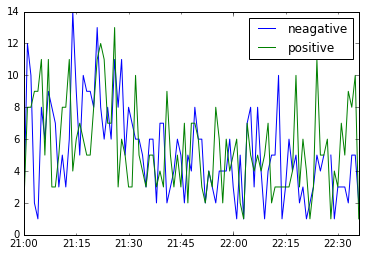

In [108]:
polarity[['neagative','positive']].plot()

In [112]:
with_pos.place_names.map(lambda x : x.split(','))

10                [Baton Rouge,  LA]
73                     [Lyndon,  KY]
91               [Farmingville,  NY]
95                    [Meriden,  CT]
152                   [Vinings,  GA]
179                 [St Helena,  CA]
182       [Sydney,  New South Wales]
186               [Minneapolis,  MN]
201                 [Watertown,  MA]
228              [Wade Hampton,  SC]
249                   [Atlanta,  GA]
293                    [Boston,  MA]
312            [West Virginia,  USA]
313                    [Denver,  CO]
339           [Doctor Phillips,  FL]
340                 [Annapolis,  MD]
360            [Massachusetts,  USA]
369                   [Fremont,  CA]
462               [Lenoir City,  TN]
479                [Bridgeport,  CT]
525                    [Steele,  MO]
637                [Washington,  DC]
645                 [Glassboro,  NJ]
657                   [St Paul,  MN]
671                     [Lyman,  SC]
678                 [Virginia,  USA]
690                  [St Louis,  MO]
7

In [113]:
from geopy.geocoders import Nominatim

In [114]:
geolocator = Nominatim()

In [115]:
location = geolocator.reverse("52.509669, 13.376294")

In [116]:
location

Location((52.5094982, 13.3765983, 0.0))

In [117]:
location.address

u'Potsdamer Platz, Mitte, Berlin, 10117, Deutschland'

In [134]:
', '.join([str(with_pos.iloc[10,:].lat),str(with_pos.iloc[10,:].long)])

'33.7671945, -84.433106'

In [135]:
location = geolocator.reverse(_)

In [136]:
location.raw['address']['state']

u'Georgia'

In [137]:
with_pos.iloc[10,:]

clean_tweets    is dude even answering the question at all gah...
dates                                               1476061766687
hour                                                            1
index                                                        2090
lat                                                       33.7672
long                                                     -84.4331
min                                                             9
place_names                                           Atlanta, GA
polarity                                                        2
polarity_cl                                                     0
tweets          Is dude even answering the question? At all? G...
sexual                                                      False
moderators                                                  False
russia                                                      False
emails                                                      False
shit      

In [145]:
len(with_pos)

7404

In [248]:
pos = with_pos[['lat','long']].as_matrix()
pos = [', '.join([str(p[0]),str(p[1])]) for p in pos]

KeyboardInterrupt: 

In [254]:
import time
def geo_loc(p):
    try:
        return geolocator.reverse(p)
    except Exception:
        time.sleep(1)
        return geo_loc(p)

In [387]:
pos = with_pos[['lat','long']].as_matrix()
pos = (', '.join([str(p[0]),str(p[1])]) for p in pos)

pos = (geo_loc(p).raw for p in pos)
pos = (my_try_address(p) for p in pos)


state_tans = {
    'Puerto Rico':'X',
    'None': 'X',
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC',
}

state = (state_tans[p] for p in pos)

In [388]:
states = []
running = True
while running:
    try:
        states.append(next(state))
    except Exception:
        running = False

KeyboardInterrupt: 

In [389]:
states

[]

In [166]:
from itertools import takewhile

In [377]:
# k = takewhile(lambda x : x[0] < 10,enumerate(pos))
def my_try_address(d):
    try:
        if d['address']['country'] == 'United States of America':
            return d['address']['state']
        else:
            return 'None'
        return d['address']['state'],d['address']['country']
    except Exception:
        return 'None'
# [my_try_address(z[1].raw) for z in list(k)]

In [202]:
d = {'a':{'b':2},'c':4}

In [205]:
d[('a','b')]

KeyError: ('a', 'b')